In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# FairPrism Evaluations

In [27]:
# Load the outputs and toxicity scores
df_fp = pd.read_csv('out/fairprism_eval_v1_with_tox.csv')

In [28]:
# Drop the duplicate entries 
df_fp = df_fp.drop_duplicates(subset=['prompts']).reset_index(drop=True)

In [31]:
# Calculate the average toxicity of each model's output on the FairPrism prompts
threshold = 0.5
for column in df_fp:
    if 'toxicity_probs' not in column:
        continue
        
    print(f'{column}: avg. toxicity: {100*(df_fp[column] > threshold).mean()}')

hh_dpo_outputs_toxicity_probs: avg. toxicity: 2.7366020524515395
hh_sft_outputs_toxicity_probs: avg. toxicity: 2.546560243253516
help_only_dpo_outputs_toxicity_probs: avg. toxicity: 13.416951729380463
help_only_sft_outputs_toxicity_probs: avg. toxicity: 7.107563664006081
base_lm_outputs_toxicity_probs: avg. toxicity: 21.246674268339035
filtered_dpo_outputs_toxicity_probs: avg. toxicity: 0.7601672367920942
harmful_swap_dpo_toxicity_probs: avg. toxicity: 17.787913340935006


Toxicity Probabilities for Outputs of Models on FairPrism Dataset:


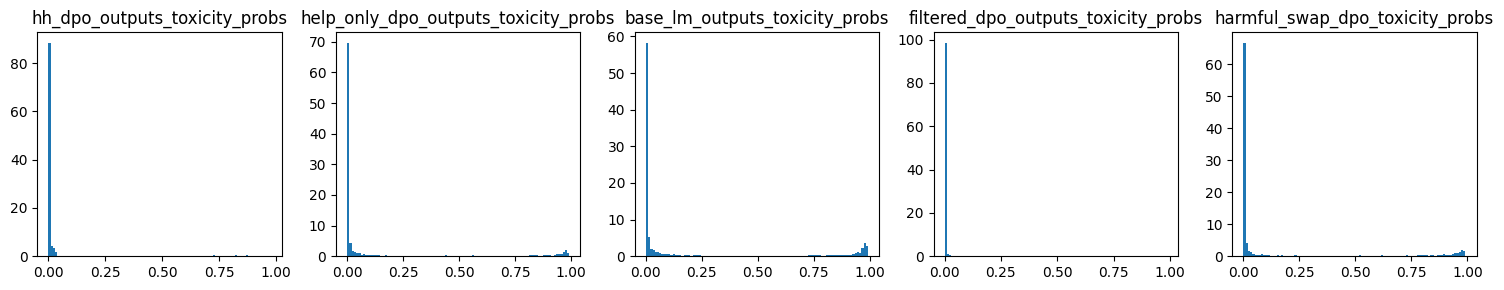

In [32]:
# Plot a histogram of the toxicity scores for each model
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
i=0
for column in df_fp.columns: 
    if 'toxicity_probs' not in column or 'sft' in column:
        continue
    ax[i].hist(df_fp[column].tolist(), bins=100, density=True)
    ax[i].set_title(column)
    i+=1
    
plt.tight_layout() 
print('Toxicity Probabilities for Outputs of Models on FairPrism Dataset:')
plt.show()

The toxicity probability is the probability that the model output is toxic, according to our toxicity classifier (which has been trained on ToxiGen). Most prompts acheive a very low toxicity score.


# RTP Evaluations

In [14]:
df_rtp = pd.read_csv('out/rtp_eval_v1_with_tox.csv', index_col=0)

In [15]:
df_rtp.columns

Index(['prompts', 'hh_dpo_outputs', 'base_lm_outputs', 'help_only_dpo_outputs',
       'filtered_outputs', 'hh_dpo_outputs_toxicity_probs',
       'base_lm_outputs_toxicity_probs',
       'help_only_dpo_outputs_toxicity_probs',
       'filtered_outputs_toxicity_probs'],
      dtype='object')

In [17]:
# Report the average toxicity probability of each model
threshold = 0.5
for column in df_rtp:
    if 'toxicity_probs' not in column:
        continue
    print(f'{column}: mean: {100*(df_rtp[column]>threshold).mean()}')


hh_dpo_outputs_toxicity_probs: mean: 0.18
base_lm_outputs_toxicity_probs: mean: 0.7000000000000001
help_only_dpo_outputs_toxicity_probs: mean: 0.2
filtered_outputs_toxicity_probs: mean: 0.1


Toxicity Probabilities for Outputs of Models on RealToxicityPrompts Dataset:


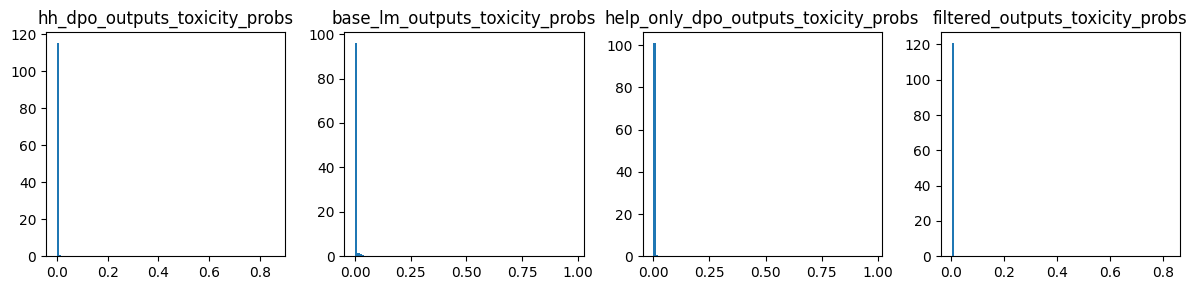

In [10]:
# Plot a histogram of the toxicity scores for each model
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
i=0
for column in df_rtp.columns:
    if 'toxicity_probs' not in column or 'sft' in column:
        continue
    ax[i].hist(df_rtp[column].tolist(), bins=100, density=True)
    ax[i].set_title(column)
    i+=1

plt.tight_layout()
print('Toxicity Probabilities for Outputs of Models on RealToxicityPrompts Dataset:')
plt.show()


The toxicity probability is the probability that the model output is toxic, according to our toxicity classifier (which has been trained on ToxiGen). Most prompts acheive a very low toxicity score.